In [1]:
! pip install numpy h5py pandas

In [2]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

Inspect the data:
Data_SSE  = h5.File('COMPAS_Output_SSE.h5')
list(Data_SSE.keys())

Inspect mergers:
CE_BSE = Data_BSE['BSE_Common_Envelopes']
#list(CE_BSE.keys())
merger = CE_BSE['Merger'][()]
print(merger.shape)     

Print log file keys (e.g. system parameter keys):
list(SP_BSE.keys())

Finding the unit of a parameter:
print(SP_BSE['Teff(1)'].attrs['units'])
print(SP_BSE['Luminosity(1)'].attrs['units'])

In [4]:
df1 = pd.read_csv('BSE_Detailed_Output_0.csv', sep = ',', header = 2)
df2 = pd.read_csv('SSE_Detailed_Output_0.csv', sep = ',', header = 2)

In [5]:
df3 = restrict(df1, 'Stellar_Type(2)', 0, 1) #MS stars only

In [6]:
df1 = restrict(df1, 'Stellar_Type(1)', 0, 1) #MS stars only
df1 = restrict(df1, 'Stellar_Type(2)', 15, 15) #MS stars only
df2 = restrict(df2, 'Stellar_Type', 0, 1) #MS stars only

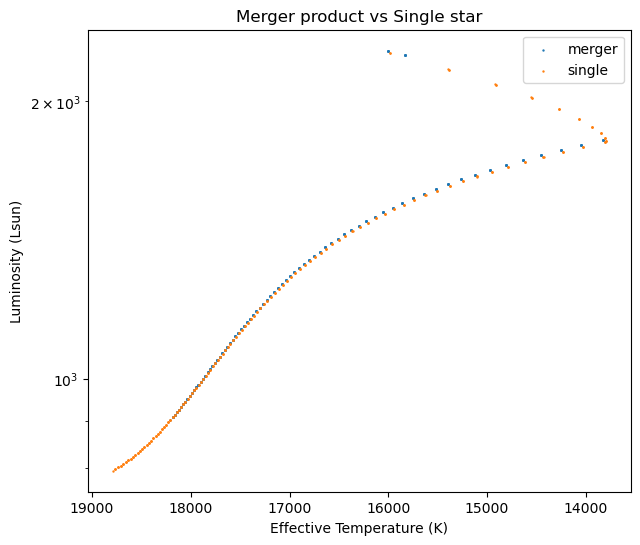

In [7]:
plt.figure(figsize=(7,6))
plt.scatter(df1['        Teff(1)         '], df1['     Luminosity(1)      '], s = 0.5, label = 'merger')
#plt.scatter(df3['        Teff(2)         '], df3['     Luminosity(2)      '], s = 0.5, label = 'binary')
plt.scatter(df2['          Teff          '], df2['       Luminosity       '], s = 0.5, label = 'single')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('Merger product vs Single star')
#plt.ylim((2e3,7e3))
plt.legend()

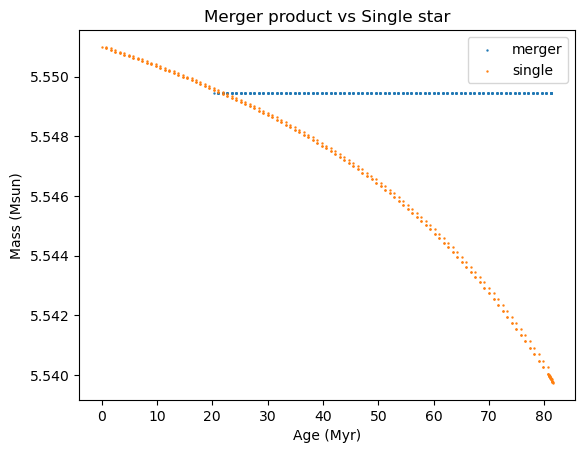

In [8]:
plt.scatter(df1['         Age(1)         '], df1['        Mass(1)         '], s = 0.5, label = 'merger')
plt.scatter(df2['          Age           '], df2['          Mass          '], s = 0.5, label = 'single')
plt.xlabel('Age (Myr)')
plt.ylabel('Mass (Msun)')
plt.title('Merger product vs Single star')
plt.ticklabel_format(useOffset=False)
plt.legend()